# Análisis Exploratorio de Datos (EDA)

## Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid")

## Carga del Conjunto de Datos

In [3]:
file_path = '../data/raw_binary/labeled_data_timeseries.parquet'
df = pd.read_parquet(file_path)

In [4]:
df.head()

,homework,pen_status,x,y,timestamp,azimuth,altitude,pressure,depression,anxiety,stress
Subject,,,,,,,,,,,
1,1,0,"[48331, 48318, 48305, 48305, 48305, 48305, 483...","[31876, 31963, 32053, 32159, 32159, 32159, 321...","[672620, 672628, 672635, 672643, 672650, 67282...","[1830, 1830, 1830, 1830, 1830, 1830, 1830, 234...","[530, 530, 530, 530, 530, 530, 530, 350, 360, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,8,13
1,1,1,"[47944, 47949, 47949, 47950, 47950, 47950, 479...","[33492, 33506, 33512, 33515, 33519, 33524, 335...","[671854, 671861, 671869, 671876, 671884, 67189...","[1800, 1800, 1800, 1800, 1800, 1810, 1810, 181...","[490, 500, 500, 500, 500, 500, 500, 500, 500, ...","[67, 148, 193, 228, 270, 306, 341, 365, 381, 3...",2,8,13
1,2,0,"[41647, 41714, 41787, 41896, 41896, 41616, 416...","[14655, 14657, 14675, 14677, 14677, 15475, 154...","[692915, 692922, 692930, 692937, 692945, 69356...","[1830, 1830, 1830, 1840, 1840, 2530, 2530, 253...","[530, 530, 530, 530, 530, 450, 450, 450, 460, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,8,13
1,2,1,"[45074, 45128, 45144, 45158, 45164, 45169, 451...","[14676, 14676, 14679, 14689, 14696, 14701, 147...","[692434, 692441, 692449, 692456, 692464, 69247...","[1930, 1940, 1940, 1940, 1940, 1940, 1940, 194...","[510, 510, 510, 510, 510, 510, 510, 510, 510, ...","[50, 207, 282, 304, 377, 418, 426, 438, 447, 4...",2,8,13
1,3,0,"[33431, 33563, 33626, 33685, 33747, 33812, 338...","[35956, 35956, 35959, 35976, 35991, 36002, 360...","[724897, 724905, 724912, 724920, 724927, 72493...","[1760, 1760, 1760, 1760, 1760, 1760, 1770, 177...","[620, 610, 610, 610, 610, 610, 600, 600, 600, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,8,13


## Estructura de los Datos

### Forma del conjunto de datos

In [5]:
print("Forma del conjunto de datos:", df.shape)

Forma del conjunto de datos: (1588, 11)


### Tipos de datos y conteo de valores no nulos

In [6]:
print("\nTipos de datos y conteo de valores no nulos:")
df.info()


Tipos de datos y conteo de valores no nulos:
<class 'pandas.core.frame.DataFrame'>
Index: 1588 entries, 1 to 129
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   homework    1588 non-null   int64 
 1   pen_status  1588 non-null   int64 
 2   x           1588 non-null   object
 3   y           1588 non-null   object
 4   timestamp   1588 non-null   object
 5   azimuth     1588 non-null   object
 6   altitude    1588 non-null   object
 7   pressure    1588 non-null   object
 8   depression  1588 non-null   int64 
 9   anxiety     1588 non-null   int64 
 10  stress      1588 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 148.9+ KB


### Resumen estadístico para columnas numéricas

In [7]:
print("\nEstadísticas descriptivas para columnas numéricas:")
df.describe()


Estadísticas descriptivas para columnas numéricas:


,homework,pen_status,depression,anxiety,stress
count,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000
mean,3.907431,0.570529,7.591310,7.935768,13.494962
std,2.127533,0.495157,6.013205,5.945322,7.566174
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,3.000000,8.000000
50%,4.000000,1.000000,6.000000,7.000000,13.500000
75%,6.000000,1.000000,10.000000,11.000000,17.000000
max,7.000000,1.000000,25.000000,31.000000,39.000000


### Frecuencia de valores únicos para columnas categóricas

In [8]:
categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    print("\nFrecuencia de valores únicos para columnas categóricas:")
    for col in categorical_cols:
        print(f"\n{col}:")
        print(df[col].value_counts())


Frecuencia de valores únicos para columnas categóricas:

x:
x
[13273, 13269, 13269, 13269, 13269, 13288, 13324, 13375, 13441, 13512, 13585, 13654, 13720, 13783, 13842, 13899, 13946, 13983, 14009, 14019, 14019, 13997, 13912, 13756, 13524, 13223, 12873, 12505, 12137, 11803, 11515, 11285, 11110, 10977, 10885, 10829, 10815, 10832, 10918, 11046, 11201, 11363, 11517, 11647, 11756, 11843, 11907, 11957, 11993, 13530, 13550, 13550, 13529, 13468, 13367, 13220, 13030, 12797, 12538, 12265, 11987, 11734, 11515, 11335, 11199, 11094, 11022, 10980, 10967, 10971, 12598, 12671, 12715, 12767, 12814, 12854, 12876, 12880, 12880, 12851, 12805, 12743, 12673, 12592, 12507, 12431, 12373, 12341, 12331, 12331, 12344, 12382, 12966, 12877, 12818, 12749, 12677, 12613, 12558, 12519, ...]    1
[48331, 48318, 48305, 48305, 48305, 48305, 48305, 47112, 47096, 47067, 47022, 46962, 46950, 46889, 46884, 46917, 46975, 47063, 47181, 47319, 47472, 47616, 47741, 47843, 47918, 47968, 48002, 48002, 47989, 47999, 47999, 47963, 4

### Verificación de valores nulos

In [9]:
print("\nValores faltantes en el conjunto de datos:")
df.isnull().sum()


Valores faltantes en el conjunto de datos:


homework      0
pen_status    0
x             0
y             0
timestamp     0
azimuth       0
altitude      0
pressure      0
depression    0
anxiety       0
stress        0
dtype: int64

## Análisis de Univariante

### Visualizaciones para Datos Numéricos

In [10]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

#### Histogramas

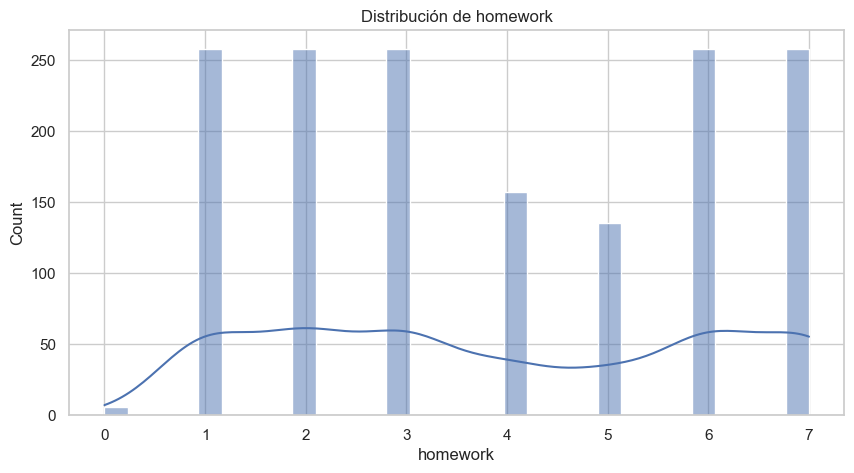

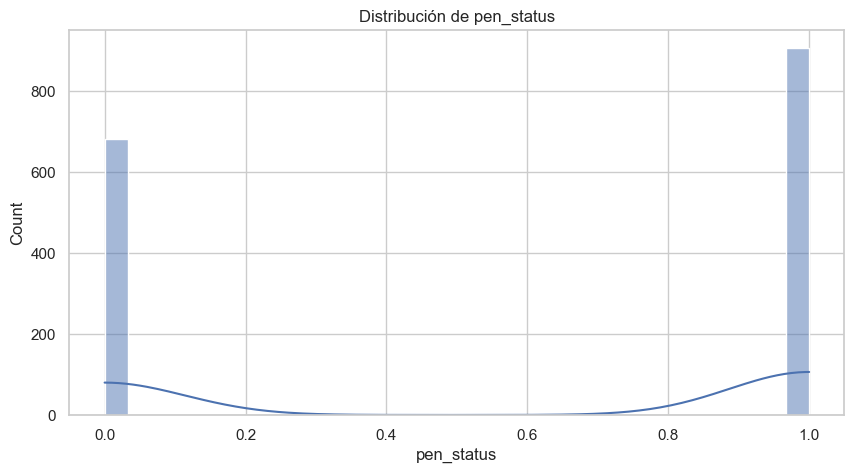

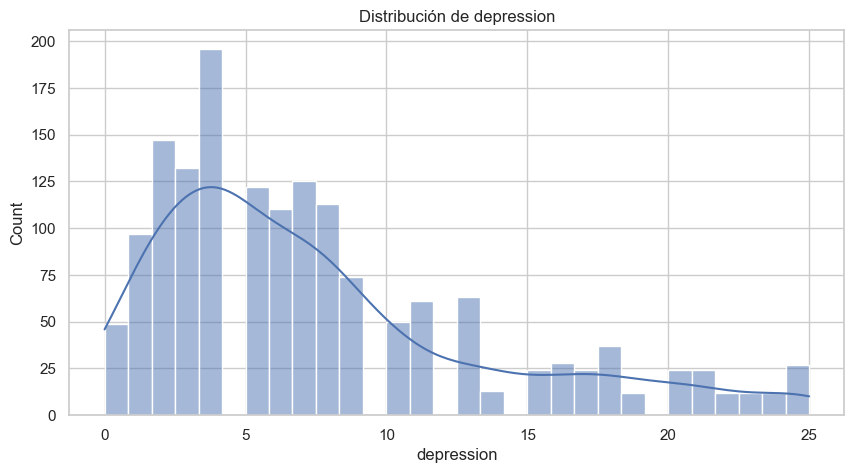

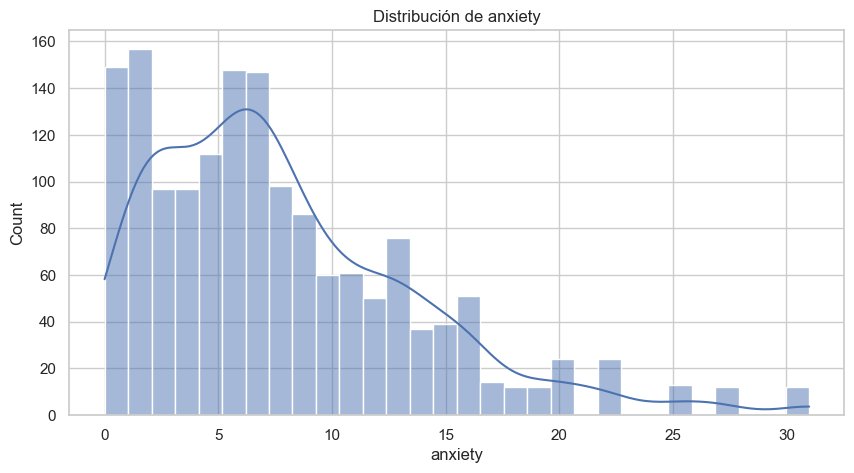

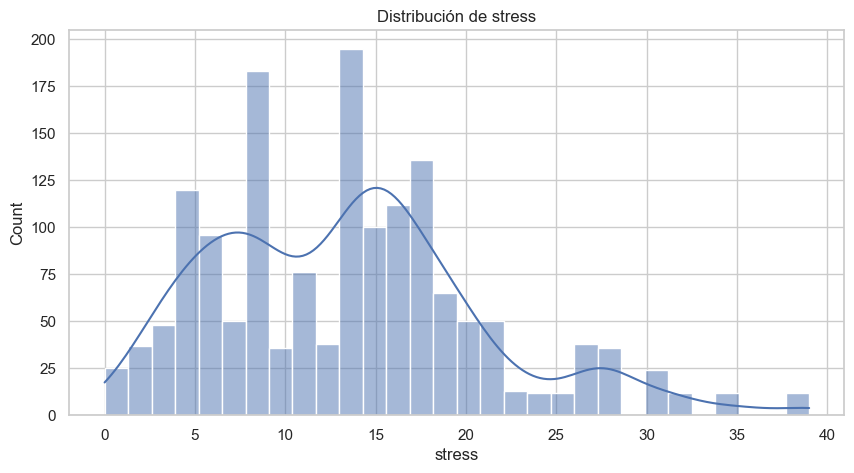

In [11]:
for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribución de {col}")
    plt.show()

#### Diagramas de Caja

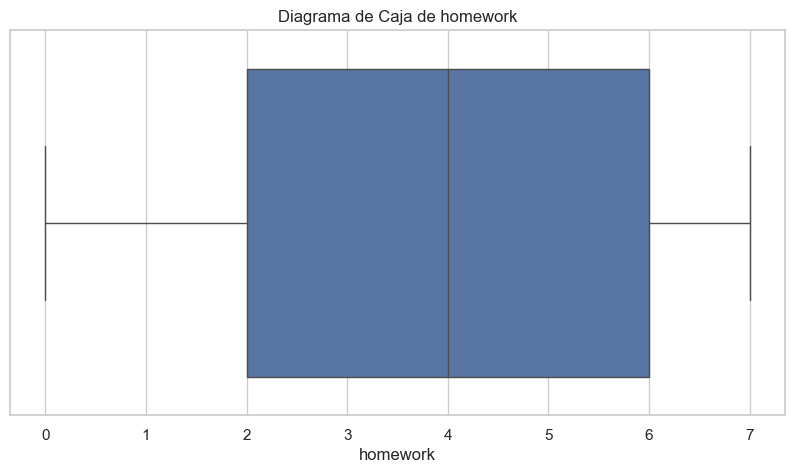

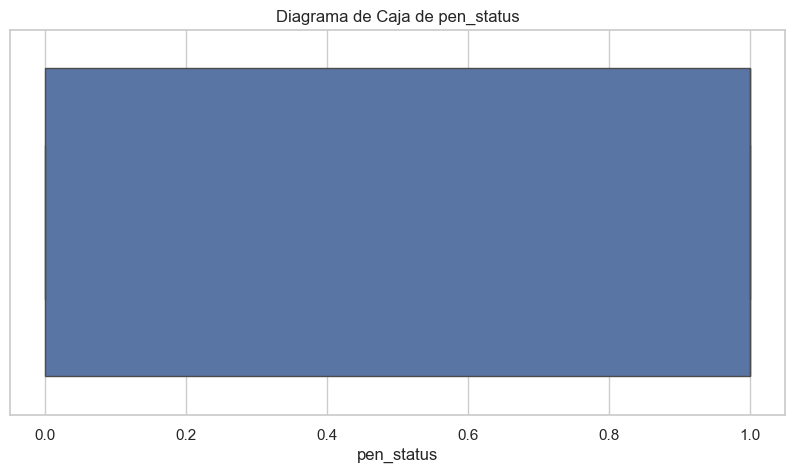

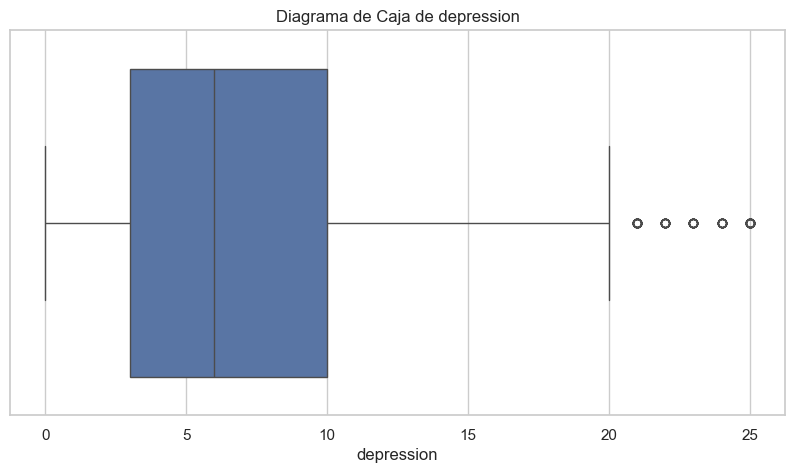

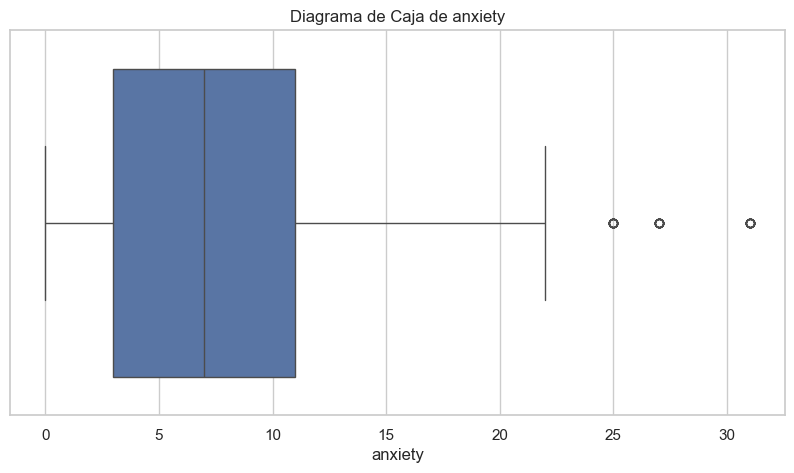

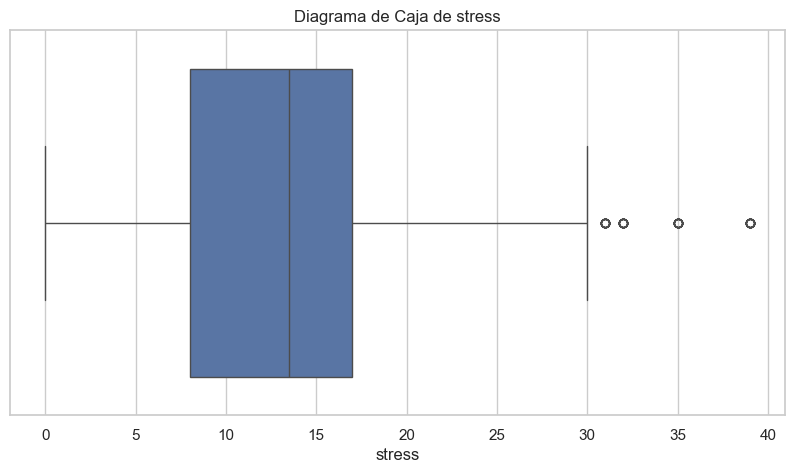

In [12]:
for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f"Diagrama de Caja de {col}")
    plt.show()

### Visualizaciones para Datos Categóricos

In [13]:
# TODO


## Análisis Bivariado y Multivariado

### Análisis de Correlación para Variables Numéricas

#### Matriz de Correlación

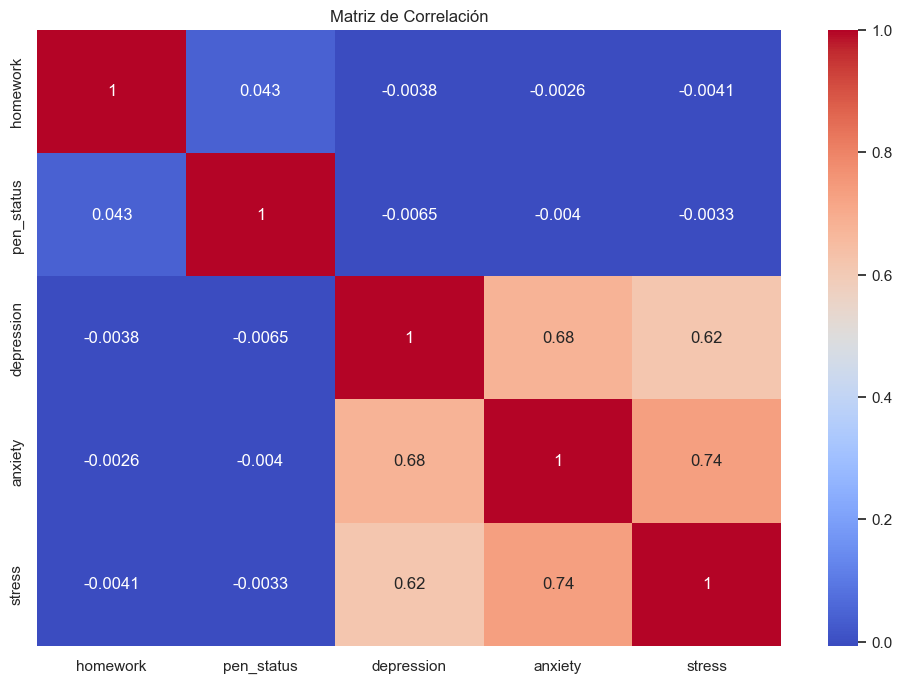

In [14]:
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

#### Pairplots

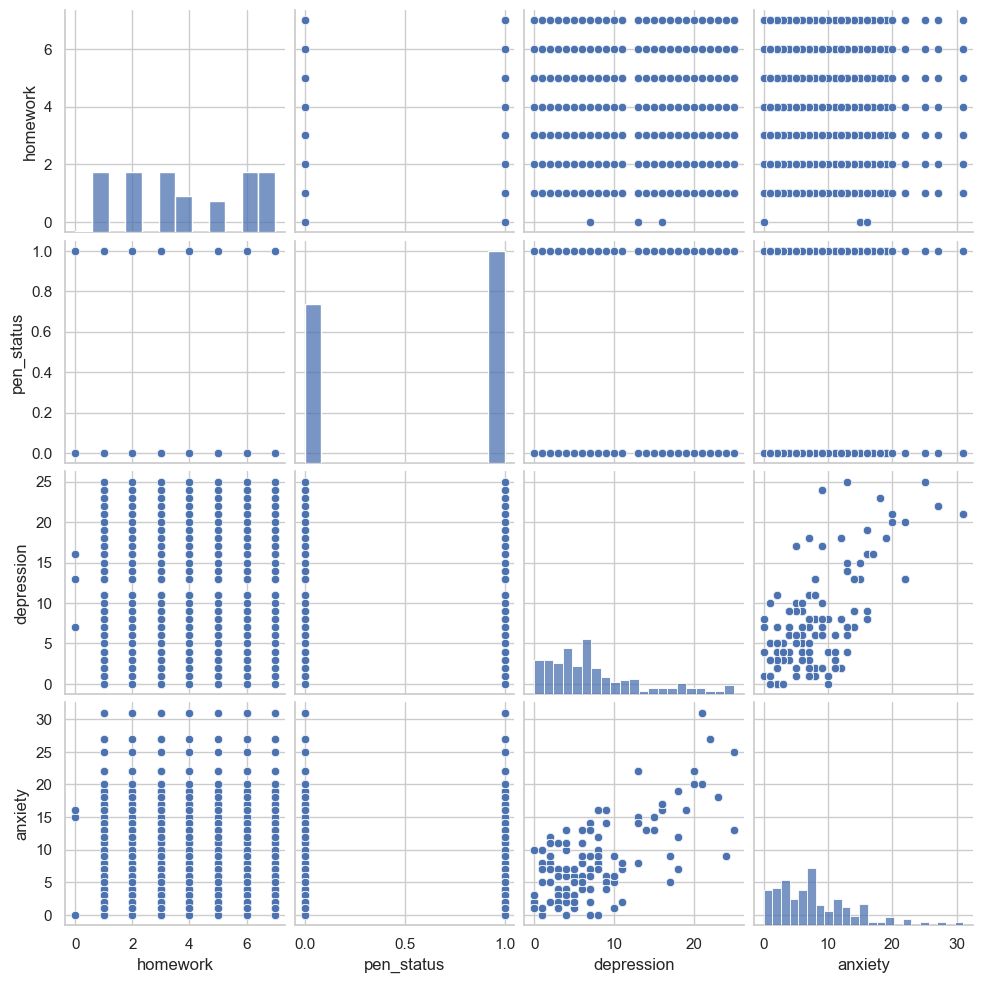

In [15]:
important_cols = numeric_cols[:4] 
sns.pairplot(df[important_cols])
plt.show()

## Análisis de Series de Tiempo

### Expansión de Columnas con listas del Dataframe

In [16]:
# Expandir columnas con listas en filas separadas
df_expanded = df.explode(['x', 'y', 'timestamp', 'azimuth', 'altitude', 'pressure']).reset_index()

# Convertir columnas expandidas a numéricas
for col in ['x', 'y', 'timestamp', 'azimuth', 'altitude', 'pressure']:
    df_expanded[col] = pd.to_numeric(df_expanded[col])

# Mostrar las primeras filas del conjunto de datos expandido
df_expanded.head()

,Subject,homework,pen_status,x,y,timestamp,azimuth,altitude,pressure,depression,anxiety,stress
0,1,1,0,48331,31876,672620,1830,530,0,2,8,13
1,1,1,0,48318,31963,672628,1830,530,0,2,8,13
2,1,1,0,48305,32053,672635,1830,530,0,2,8,13
3,1,1,0,48305,32159,672643,1830,530,0,2,8,13
4,1,1,0,48305,32159,672650,1830,530,0,2,8,13


In [17]:
def plot_subject_data(subject_id, pen_status, homework_id):
    """
    Función para graficar datos de dispersión para un sujeto específico,
    con un estado de lápiz y una tarea específicos.

    Parámetros:
    subject_id (int): ID del sujeto.
    pen_status (int): Estado del lápiz (activo/inactivo).
    homework_id (int): ID de la tarea.
    """
    # Filtrar los datos
    sample_subject_data = df_expanded[(df_expanded['Subject'] == subject_id) &
                                      (df_expanded['pen_status'] == pen_status) &
                                      (df_expanded['homework'] == homework_id)]

    # Verificar si los datos filtrados no están vacíos
    if not sample_subject_data.empty:
        # Crear el gráfico de dispersión
        plt.figure(figsize=(5, 5))
        plt.scatter(-sample_subject_data['y'], sample_subject_data['x'], s=3, c='blue', alpha=0.6)
        plt.title(f"Gráfico de Dispersión: Sujeto {subject_id}, Estado del Lápiz {pen_status}, Tarea {homework_id}")
        plt.xlabel("Posición -y")
        plt.ylabel("Posición x")
        plt.grid(True)
        plt.show()
    else:
        print(f"No se encontraron datos para Sujeto {subject_id}, Estado del Lápiz {pen_status}, Tarea {homework_id}.")

In [18]:
def plot_series_data(subject_id, homework_id, pen_status):
    """
    Graficar las series temporales de las posiciones x e y para un sujeto específico.

    Parámetros:
    subject_id (int): ID del sujeto.
    homework_id (int): ID de la tarea.
    pen_status (int): Estado del lápiz (activo/inactivo).
    """
    # Filtrar los datos del sujeto
    subject_data = df_expanded[(df_expanded['Subject'] == subject_id) &
                               (df_expanded['homework'] == homework_id) &
                               (df_expanded['pen_status'] == pen_status)]

    if not subject_data.empty:
        # Graficar las posiciones x
        plt.figure(figsize=(12, 6))
        plt.plot(subject_data['timestamp'], subject_data['x'], label="x", color="blue")
        plt.title(f"Serie Temporal de x: Sujeto {subject_id}, Tarea {homework_id}, Estado del Lápiz {pen_status}")
        plt.xlabel("Timestamp")
        plt.ylabel("Posición x")
        plt.grid()
        plt.show()

        # Graficar las posiciones y
        plt.figure(figsize=(12, 6))
        plt.plot(subject_data['timestamp'], subject_data['y'], label="y", color="orange")
        plt.title(f"Serie Temporal de y: Sujeto {subject_id}, Tarea {homework_id}, Estado del Lápiz {pen_status}")
        plt.xlabel("Timestamp")
        plt.ylabel("Posición y")
        plt.grid()
        plt.show()
    else:
        print(f"No se encontraron datos para Sujeto {subject_id}, Tarea {homework_id}, Estado del Lápiz {pen_status}.")

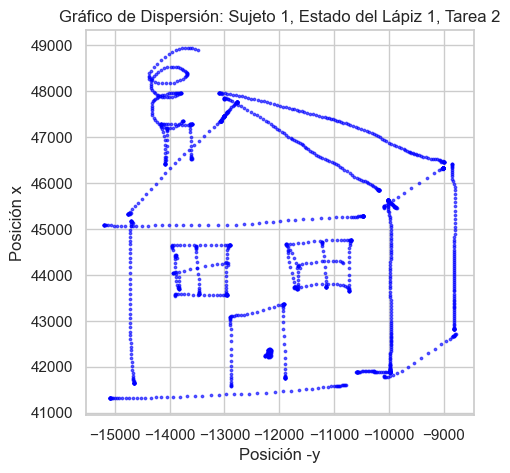

In [19]:
plot_subject_data(subject_id=1, pen_status=1, homework_id=2)

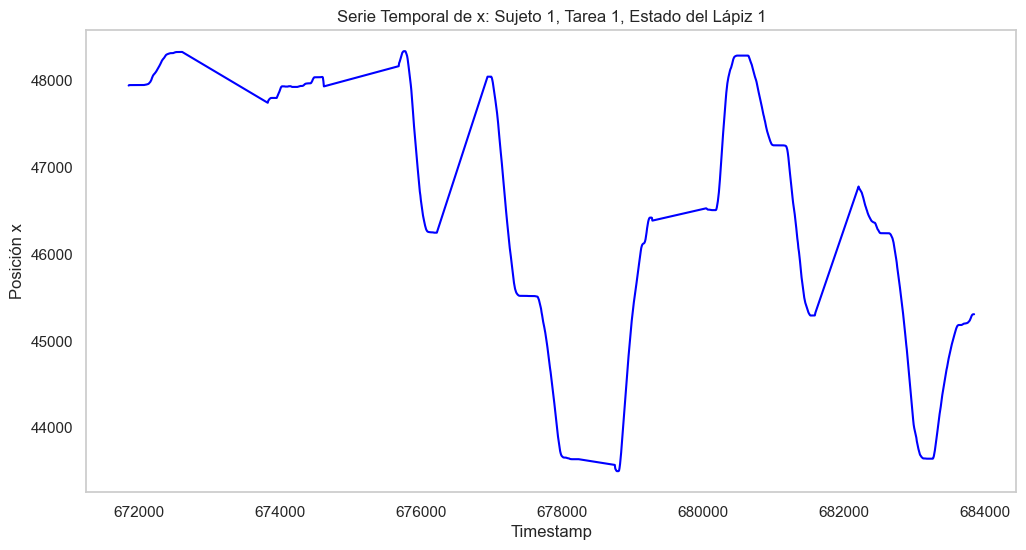

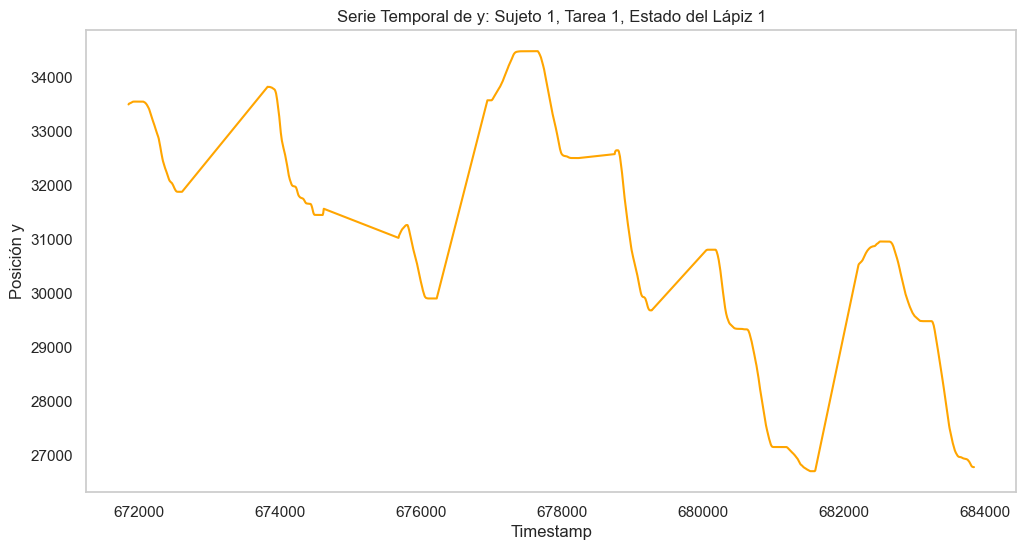

In [20]:
plot_series_data(subject_id=1, homework_id=1, pen_status=1)

### Visualización de Datos de Series Temporales

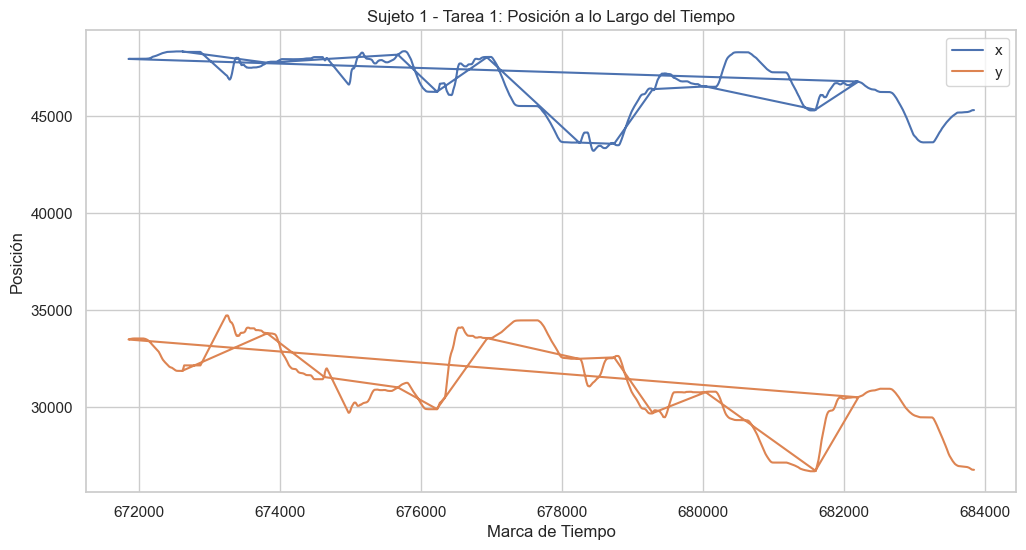

In [21]:
# Graficar series para un sujeto y tarea específicos
subject_id = 1
homework_id = 1

subject_data = df_expanded[(df_expanded['Subject'] == subject_id) & 
                           (df_expanded['homework'] == homework_id)]

# Graficar posiciones x e y a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(subject_data['timestamp'], subject_data['x'], label='x')
plt.plot(subject_data['timestamp'], subject_data['y'], label='y')
plt.title(f"Sujeto {subject_id} - Tarea {homework_id}: Posición a lo Largo del Tiempo")
plt.xlabel("Marca de Tiempo")
plt.ylabel("Posición")
plt.legend()
plt.show()

## Preprocesamiento de los datos

### Manejo de Valores Faltantes

No hay datos faltantes en el conjunto de datos.

### Manejo de Valores Atípicos

In [22]:
# Crear una copia del dataframe original para el preprocesamiento
df_processed = df.copy()

# Detectar y manejar valores atípicos usando el método IQR
for col in numeric_cols:
    Q1 = df_processed[col].quantile(0.25)
    Q3 = df_processed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Limitar valores atípicos
    df_processed[col] = np.where(df_processed[col] < lower_bound, lower_bound, df_processed[col])
    df_processed[col] = np.where(df_processed[col] > upper_bound, upper_bound, df_processed[col])

# Mostrar las primeras filas del dataframe procesado
df_processed.head()

,homework,pen_status,x,y,timestamp,azimuth,altitude,pressure,depression,anxiety,stress
Subject,,,,,,,,,,,
1,1.0,0.0,"[48331, 48318, 48305, 48305, 48305, 48305, 483...","[31876, 31963, 32053, 32159, 32159, 32159, 321...","[672620, 672628, 672635, 672643, 672650, 67282...","[1830, 1830, 1830, 1830, 1830, 1830, 1830, 234...","[530, 530, 530, 530, 530, 530, 530, 350, 360, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.0,8.0,13.0
1,1.0,1.0,"[47944, 47949, 47949, 47950, 47950, 47950, 479...","[33492, 33506, 33512, 33515, 33519, 33524, 335...","[671854, 671861, 671869, 671876, 671884, 67189...","[1800, 1800, 1800, 1800, 1800, 1810, 1810, 181...","[490, 500, 500, 500, 500, 500, 500, 500, 500, ...","[67, 148, 193, 228, 270, 306, 341, 365, 381, 3...",2.0,8.0,13.0
1,2.0,0.0,"[41647, 41714, 41787, 41896, 41896, 41616, 416...","[14655, 14657, 14675, 14677, 14677, 15475, 154...","[692915, 692922, 692930, 692937, 692945, 69356...","[1830, 1830, 1830, 1840, 1840, 2530, 2530, 253...","[530, 530, 530, 530, 530, 450, 450, 450, 460, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.0,8.0,13.0
1,2.0,1.0,"[45074, 45128, 45144, 45158, 45164, 45169, 451...","[14676, 14676, 14679, 14689, 14696, 14701, 147...","[692434, 692441, 692449, 692456, 692464, 69247...","[1930, 1940, 1940, 1940, 1940, 1940, 1940, 194...","[510, 510, 510, 510, 510, 510, 510, 510, 510, ...","[50, 207, 282, 304, 377, 418, 426, 438, 447, 4...",2.0,8.0,13.0
1,3.0,0.0,"[33431, 33563, 33626, 33685, 33747, 33812, 338...","[35956, 35956, 35959, 35976, 35991, 36002, 360...","[724897, 724905, 724912, 724920, 724927, 72493...","[1760, 1760, 1760, 1760, 1760, 1760, 1770, 177...","[620, 610, 610, 610, 610, 610, 600, 600, 600, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.0,8.0,13.0


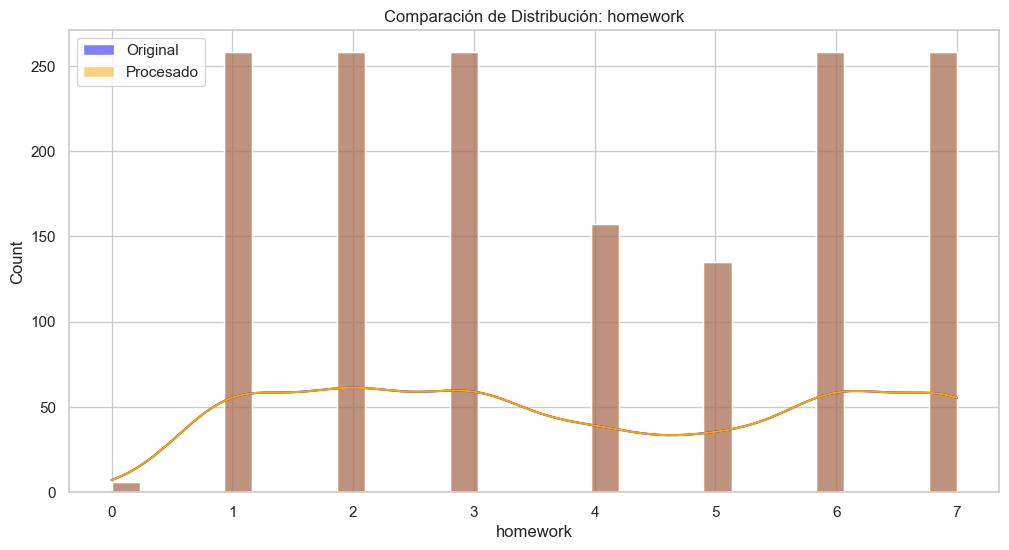

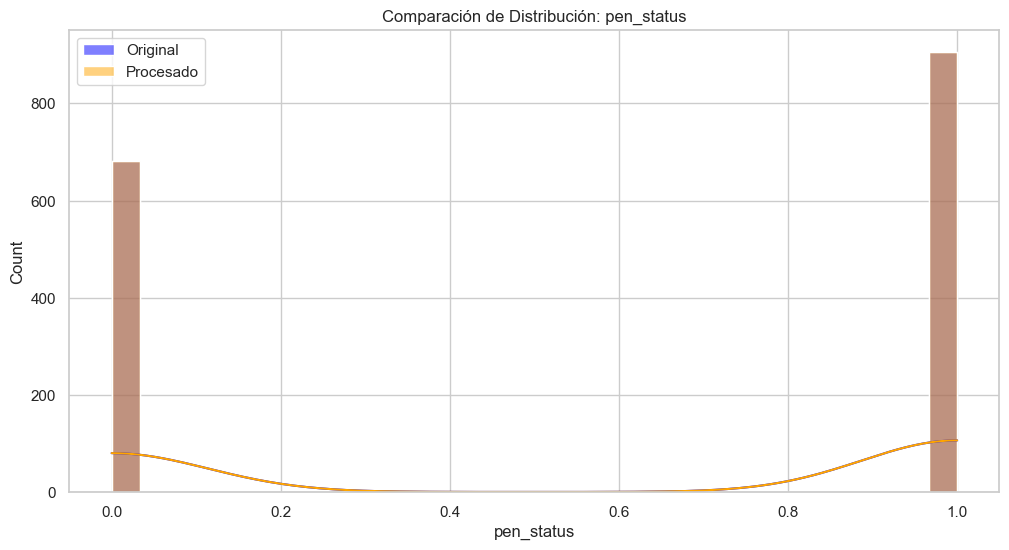

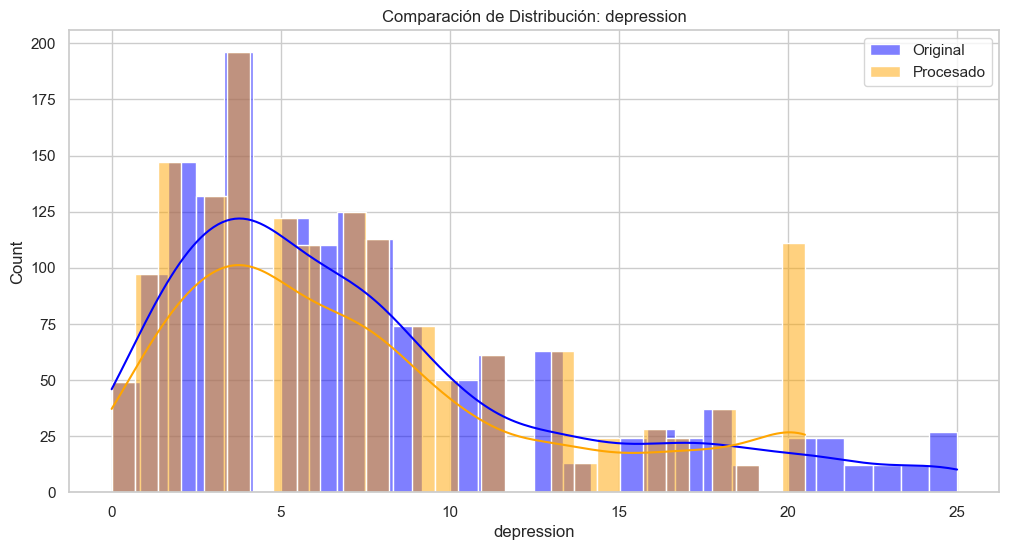

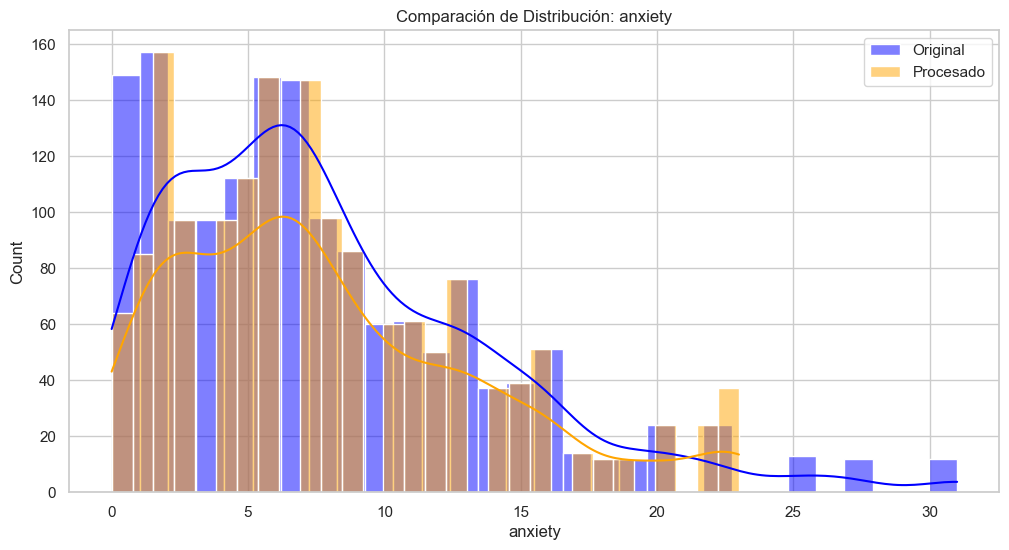

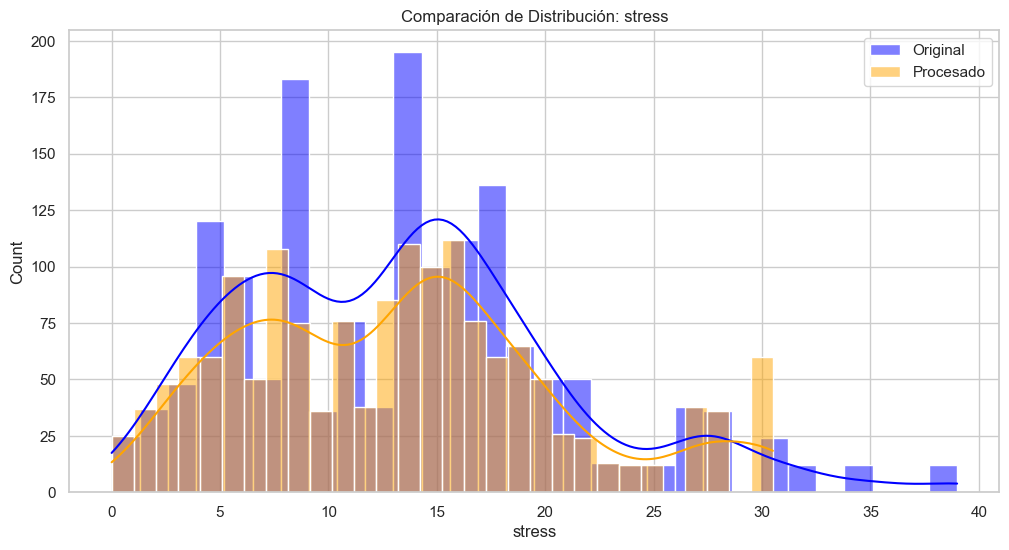

In [23]:
# Graficar distribución antes y después del preprocesamiento
for col in numeric_cols:
    plt.figure(figsize=(12, 6))
    sns.histplot(df[col], kde=True, color='blue', label='Original', bins=30)
    sns.histplot(df_processed[col], kde=True, color='orange', label='Procesado', bins=30)
    plt.title(f"Comparación de Distribución: {col}")
    plt.legend()
    plt.show()

## Conclusiones